# Inaugural Project

Imports and set magics:

In [54]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from Python import HouseholdSpecializationModelClass
from PythonExtension import HouseholdSpecializationModelClassExtension
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [55]:
# 1. We start by setting our sigma & alpha values
alpha = [0.25, 0.50, 0.75] #Alpha values
sigma = [0.5, 1.0, 1.5] #Sigma values

# 2. Creating empty list for HF and HM values
HF_list = []
HM_list = []

# 3. Creating nested loop, to loop through the values and print the results
for a in alpha:
    for s in sigma:
        # a. Calling the class
        model_q1 = HouseholdSpecializationModelClass() 
        
        # b. Inserting values into the model
        model_q1.par.alpha = a 
        model_q1.par.sigma = s 

        # c. Solving the model
        opt = model_q1.solve_discrete() 

        # d. Appending the HM & HF values to the empty lists
        HF_list.append(opt.HF) 
        HM_list.append(opt.HM)

# 4. Creating a list of the ratios between HF and HM        
HF_HM_List = np.array(HF_list)/np.array(HM_list)

# 5. Reshaping the list into a 3x3 matrix
HF_HM_values = np.reshape(HF_HM_List, (3, 3))

# 6. Combining sigma, alpha, and HM_HF_values into a table
table = [['Alpha/Sigma'] + sigma] + [[alpha[i]] + HF_HM_values[i].tolist() for i in range(len(alpha))]

# 7. Printing the table with a nicer format
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

c:\Users\bjorn\OneDrive - University of Copenhagen\4. semester\IntroProg\projects-2023-pied-piper\inauguralproject\Python.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


╒═══════════════╤══════════╤══════════╤══════════╕
│   Alpha/Sigma │      0.5 │      1.0 │      1.5 │
╞═══════════════╪══════════╪══════════╪══════════╡
│          0.25 │ 0.545455 │ 0.307692 │ 0.214286 │
├───────────────┼──────────┼──────────┼──────────┤
│          0.5  │ 1        │ 1        │ 1        │
├───────────────┼──────────┼──────────┼──────────┤
│          0.75 │ 1.83333  │ 3.25     │ 4.66667  │
╘═══════════════╧══════════╧══════════╧══════════╛


We see that when alpha is less that 0.5 the HF/HM ratio is decreasing with sigma. The opposite is true when alpha is bigger than 0.5, here the HF/HM ratio is increasing with a rising sigma value.

This relation stems from the fact that alpha is the measure for productivity at home for females relative to males. When sigma is neither 0 nor 1 homeproduction is given from a CES function. Alpha bigger than 0.5 implies homeproduction for females is more efficient than for males, this results in a increase in the HF/HM ratio as we see. The opposite is true for alpha less than 0.5 because females are less efficient than males in that case.

When alpha = 0.5 home productivity is equal for both females and males why the HF/HM ratio is equal to 1 no matter the size of sigma. 

# Question 2

Explain your code and procedure

In [56]:
# 1. Creating wF values
var_wF = np.linspace(0.8, 1.2, 5)

# 2. Empty lists to store values
sol_WFWM_q2 = []
sol_HFHM_q2 = []

# 3. Creating a loop to solve the model for each wF value
for w in var_wF:
    # a. Calling the class
    model_q2 = HouseholdSpecializationModelClass()

    # b. Inserting values into the model
    model_q2.par.wF = w 

    # c. Solving the model
    opt_q2 = model_q2.solve_discrete()

    # d. Calculating the ratios
    HFHM = opt_q2.HF/opt_q2.HM 
    WFWM = w/model_q2.par.wM

    # e. Appending the calculated ratios
    sol_HFHM_q2.append(HFHM) 
    sol_WFWM_q2.append(WFWM) 

# 4. Taking log to the lists
log_sol_WFWM_q2 = np.log(sol_WFWM_q2) 
log_sol_HFHM_q2 = np.log(sol_HFHM_q2) 

Now we plot the lists from above

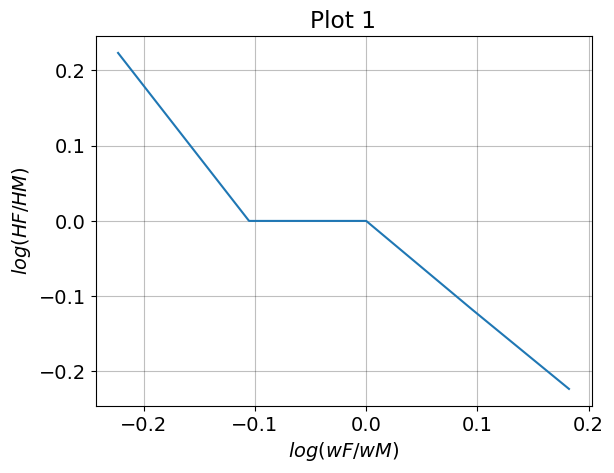

In [57]:
# 1. Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# 2. Creating the figure
fig = plt.figure()

# 3. Making plot
ax = fig.add_subplot(1,1,1)
ax.plot(log_sol_WFWM_q2,log_sol_HFHM_q2)

# 4. Setting labels and title
ax.set_title('Plot 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

The plot is made with alpha = 0.5 indicating that both partners are equally productive at home. Furthermore sigma = 1 meaning that their work is perfectly substituteable. 

From the figure above we see that when womens wages increases relative to mens wages, women spend less time at home, resulting in a decrease in the HF/HM-ratio when there is an increase in the wF/wM ratio. 

When womens wages relative to mens reach the points 0.9 & 1.0 we see that the relative distribution of hours dedicated to household work remains consistent.

# Question 3

In [58]:
# 1. Calling the class
model = HouseholdSpecializationModelClass()

# 2. Creating empty lists
list_HFHM = []
list_WFWM = []

# 3. Solving the model for each wF value
model.solve_wF_vec()

# 4. Calculating HF/HM ratio and taking log to the lists
log_sol_WFWM = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_sol_HFHM = np.log(model.par.wF_vec)

Now we plot the lists found above

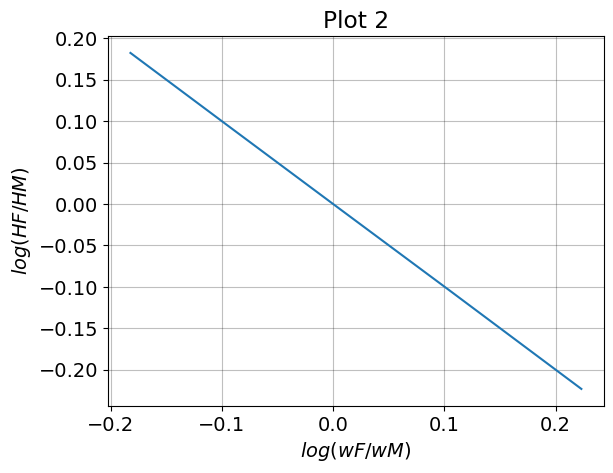

In [59]:
# 1. Creating the figure
fig = plt.figure()

# 2. Making plot
ax = fig.add_subplot(1,1,1)
ax.plot(log_sol_WFWM,log_sol_HFHM)

# 3. Setting labels and title
ax.set_title('Plot 2')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

In Plot 2 we see the same result as in Plot 1. There is a negative relationship between the female wage relative to male and the hours worked at home. However by using the discrete solver we get a much smoother graph that is linear. 

As mentioned above alpha = 0.5 and sigma = 1 meaning they are equally productive at home and their work is perfect substitutes. This means as females earn a higher wage they spend less time at homeproduciton, whereby we get a negative linear relationship between wage and hours spend at home. 

# Question 4


In [60]:
# 1. Calling the class
model = HouseholdSpecializationModelClass()

# 2. Solving the model 
model.estimate()

Optimal values: alpha = 0.98249, sigma = 0.09932


In [61]:
# 1. Using Linspace to create values for sigma and alpha
alpha = np.linspace(0.95,0.99,20)
sigma = np.linspace(0.05,0.1,20)

# 2. Creating empty list
func_vec = []

# 3. Creating nested loop to loop through values
for i, a in enumerate(alpha):
    for j, s in enumerate(sigma):
        # a. Calling the class
        model = HouseholdSpecializationModelClass() 

        # b. Inserting alpha and sigma values in model
        model.par.alpha = a 
        model.par.sigma = s 

        # c. Solving the model
        model.solve_wF_vec() 

        # d. Running regression
        model.run_regression()

        # e. Calculating function value
        func_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)

        # f. Appending function value if bigger than 0
        if func_value > 0:
            func_vec.append(func_value)

# 4. Making alpha and sigma same length as the function
func_vals = np.array(func_vec).reshape(len(alpha), len(sigma))            

Plotting our solution in a 3D plot

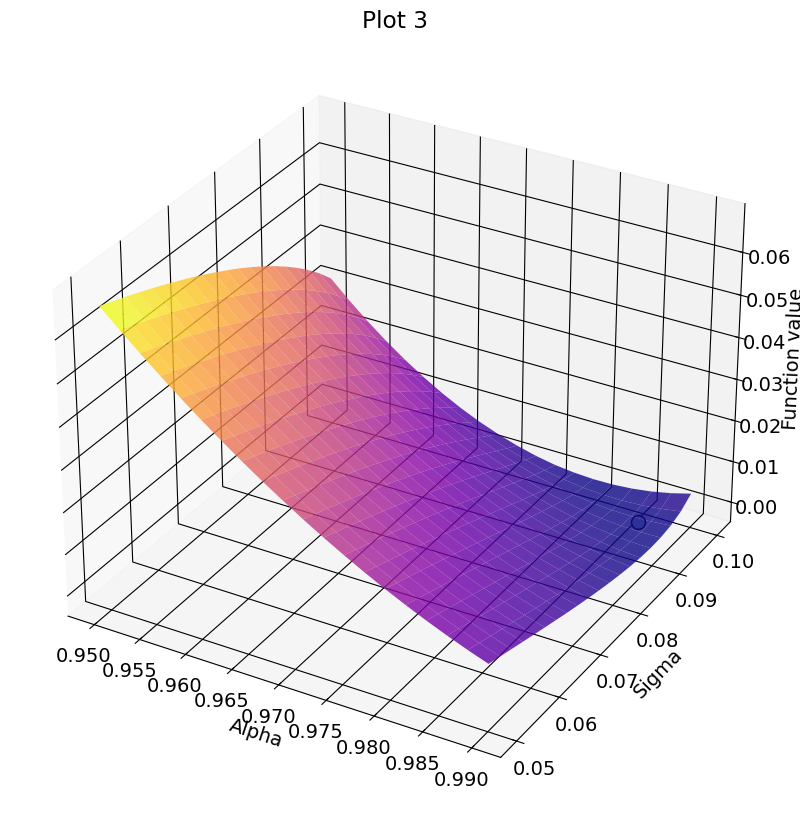

In [62]:
# 1. Create 2D grids of alpha and sigma values for plotting
alpha_grid, sigma_grid = np.meshgrid(alpha, sigma)

# 2. Create 3D plot
fig = plt.figure(figsize=(10,10)) #Initiating figure

# 3. Making the plot 3D
ax = plt.axes(projection='3d') 
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='plasma', alpha = 0.80) 
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2], color='lightblue', s=100, edgecolors='black', marker='o') 

# 4. Setting labels and titles
ax.set_xlabel('Alpha') 
ax.set_ylabel('Sigma') 
ax.set_zlabel('Function value') 
ax.set_title('Plot 3') 
plt.show() 

We find that alpha = 0.98249 and sigma = 0.09932 when fitted to the $\beta_0$ & $\beta_1$ values. From our estimated values for alpha and sigma we get that females are more productive at home and the very low sigma value means the substitution between male and female labour is very small. 

# Question 5: Disutility extension

In this part of the assignment we will be making add an disutility parameter to our model, so that males and females gain different disutility from working. We will do this by differentiating the parameter $\epsilon$ for men and women: $\epsilon_M$ and $\epsilon_F$. We get the following model:

$\frac{Q^{1-\rho}}{1-\rho}-\nu(\frac{T_{M}^{1+\frac{1}{\epsilon_M}}}{1+\frac{1}{\epsilon_M}}+\frac{T_{F}^{1+\frac{1}{\epsilon_F}}}{1+\frac{1}{\epsilon_F}})$

By doing this we have that $\epsilon_F<\epsilon_M$ men experience less disutility from working more hours than men, where as the opposite is true when $\epsilon_F>\epsilon_M$.

Our alpha value is set at $\alpha=0.5$ furthermore it is assumed that $w_M=w_F=1$. 
 

In [63]:
# 1. Calling the class
model_extension = HouseholdSpecializationModelClassExtension()

# 2. Solving the model 
model_extension.estimate()

c:\Users\bjorn\OneDrive - University of Copenhagen\4. semester\IntroProg\projects-2023-pied-piper\inauguralproject\PythonExtension.py:67: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\bjorn\OneDrive - University of Copenhagen\4. semester\IntroProg\projects-2023-pied-piper\inauguralproject\PythonExtension.py:79: RuntimeWarning: invalid value encountered in double_scalars
  disutility = par.nu*(TM**epsilon_M/epsilon_M+TF**epsilon_F/epsilon_F)


Optimal values: epsilonF = 1.67146, sigma = 0.09651


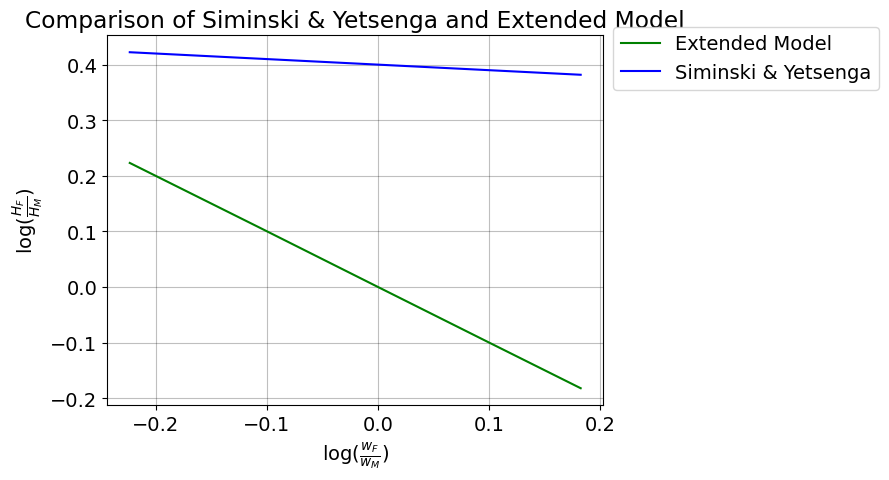

In [64]:
# 1. Calling the class
model_extension = HouseholdSpecializationModelClassExtension()

# 2. Solving the model 
model_extension.solve_wF_vec()

# 3. Calculating HF/HM ratio and taking log to the lists
log_sol_HFHM_ext = np.log(model_extension.sol.HF_vec / model_extension.sol.HM_vec)
logwFwM_ratio = np.log([0.8, 0.9, 1.0, 1.1, 1.2])

# 4. Setting beta values
beta0 = 0.4
beta1 = -0.1

# 5. Calculating Siminski & Yetsenga values
x = np.log(np.linspace(0.8, 1.2, 2))
y = beta0 + beta1*x

#6. Creating the plot
plt.plot(logwFwM_ratio, log_sol_HFHM_ext, color="green", label="Extended Model")
plt.plot(x, y, color="blue", label="Siminski & Yetsenga")

# 7. Setting legends
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05))

# 8. Set title and labels
plt.xlabel(f"log"r"$(\frac{w_F}{w_M})$")
plt.ylabel(f"log"r"$(\frac{H_F}{H_M})$")
plt.title("Comparison of Siminski & Yetsenga and Extended Model")

plt.show()

We that our $\epsilon_F=1.67$ and therefore bigger than our $\epsilon_M$ meaning women experience less dissutility from working more hours than men.

Furthermore we see that our estimated model is not fitting that well with the Siminski & Yetsenga model. Ours is a lot steeper meaning that women work a lot less hours at home with a smaller increase in salary compared to men. 